# Pesquisa e Análise para Vendas de Livros no Brasil

## Contexto

O mercado editorial brasileiro é diversificado e dinâmico, refletindo uma vasta gama de preferências e comportamentos de leitura. Com o objetivo de otimizar as estratégias de vendas e promover um portfólio de livros mais alinhado com as demandas dos leitores, realizamos uma análise detalhada dos dados literários disponíveis.

## Objetivo

Esta pesquisa visa fornecer uma visão abrangente sobre os padrões de leitura e as preferências dos consumidores em diferentes regiões do Brasil. A análise se concentra nos seguintes aspectos:

1. **Distribuição de Leitores por Faixa Etária e Gênero:** Entender como diferentes faixas etárias se distribuem entre os gêneros literários ajuda a identificar os segmentos de mercado mais promissores.
2. **Popularidade de Gêneros por Faixa Etária:** Avaliar a popularidade de diferentes gêneros entre faixas etárias específicas pode informar a criação de campanhas de marketing mais eficazes.
3. **Preferências Regionais por Gênero:** Analisar as preferências de gênero por região permite adaptar a oferta de livros de acordo com as demandas locais.
4. **Distribuição de Idade por Gênero:** Explorar a faixa etária dos leitores de cada gênero ajuda a entender melhor a demografia do público-alvo.
5. **Gêneros Mais Vendidos por Estado:** Identificar os gêneros mais vendidos ou vistos em cada estado oferece insights sobre o desempenho regional dos livros.

## Referência

Os dados para esta análise foram obtidos através da [API Gutendex](https://gutendex.com/), que fornece informações abrangentes sobre livros disponíveis publicamente.

![Biblioteca](https://upload.wikimedia.org/wikipedia/commons/d/df/Biblioteca_Barzio.jpg)
vendas de livros no Brasil.
ndas de livros no Brasil.
de livros no Brasil.



### Distribuição de Leitores por Faixa Etária por Gênero (Gráfico de Pizza)  
O gráfico de pizza revela a distribuição de leitores por faixa etária para cada gênero literário. Isso ajuda a identificar quais faixas etárias dominam a leitura em diferentes gêneros e pode orientar campanhas de marketing direcionadas.


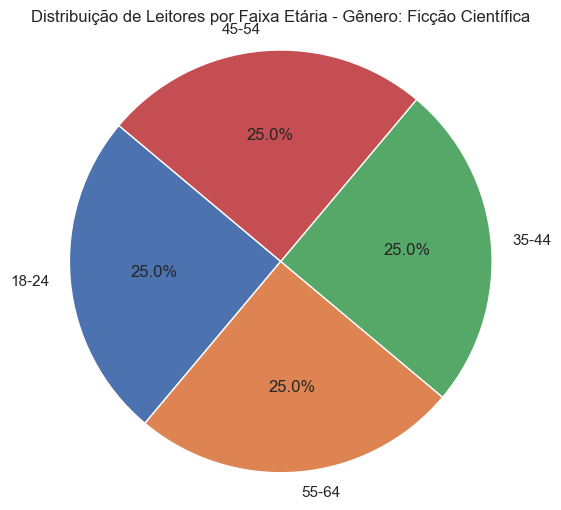

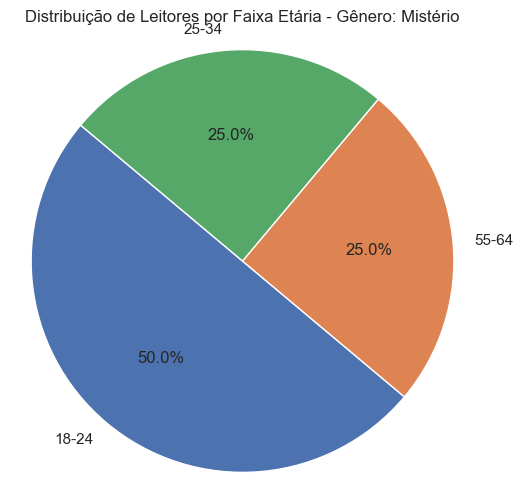

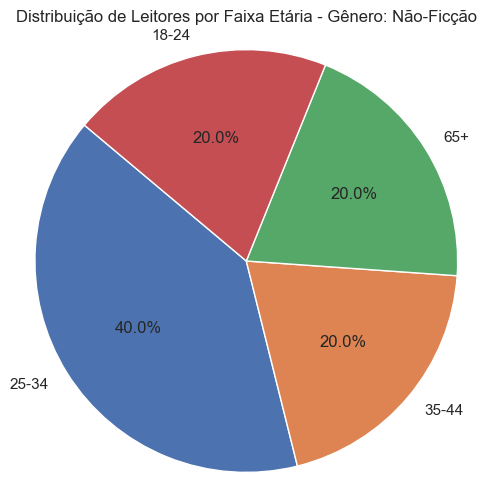

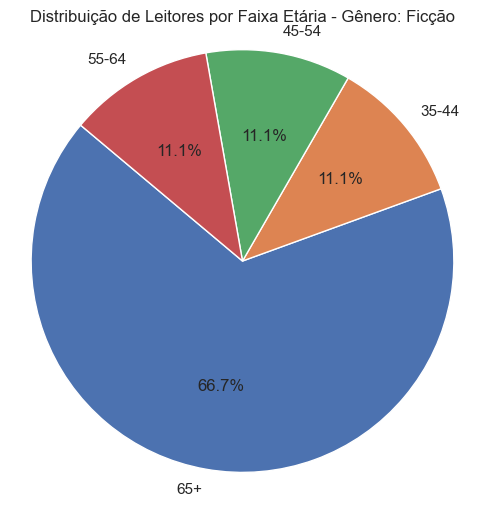

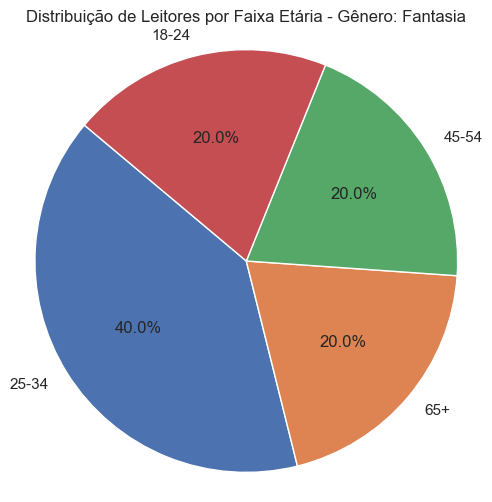

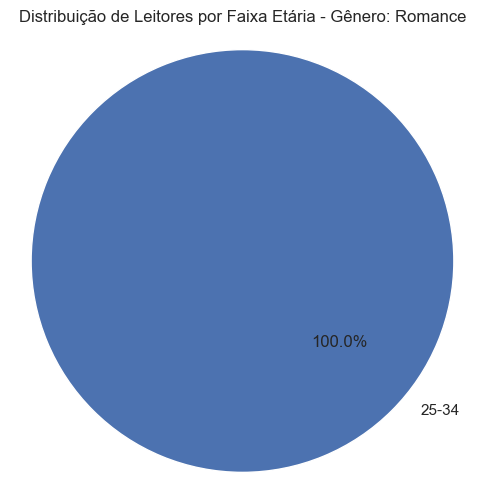

In [61]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Any

# URL base da API Gutendex
url: str = "https://gutendex.com/books/"

# Fazendo a requisição GET para o endpoint /books
response: requests.Response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data: Dict[str, Any] = response.json()  # Obtendo a resposta em formato JSON
    books: list = data['results']  # Extraindo a lista de livros

    # Transformando a lista de livros em um DataFrame do Pandas
    df: pd.DataFrame = pd.DataFrame(books)
else:
    print("Falha na requisição da API. Status Code:", response.status_code)
    df: pd.DataFrame = pd.DataFrame()  # Criando um DataFrame vazio como fallback

# Simulação de dados de leitura para o Brasil com base na API Gutendex
data_br: Dict[str, Any] = {
    'book_id': df['id'],
    'title': df['title'],
    'genre': np.random.choice(['Ficção', 'Não-Ficção', 'Ficção Científica', 'Fantasia', 'Mistério', 'Romance'], len(df)),
    'age_group': np.random.choice(['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], len(df)),
    'region': np.random.choice(['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul'], len(df)),
    'state': np.random.choice(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'], len(df))
}

df_br: pd.DataFrame = pd.DataFrame(data_br)

# Continuação do seu código de visualização:
for genre in df_br['genre'].unique():
    age_distribution: pd.Series = df_br[df_br['genre'] == genre]['age_group'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribuição de Leitores por Faixa Etária - Gênero: {genre}')
    plt.axis('equal')
    plt.show()


### Popularidade de Gênero por Faixa Etária (Gráfico de Barras Empilhadas)  
O gráfico de barras empilhadas ilustra a popularidade de cada gênero literário entre diferentes faixas etárias. Isso permite entender melhor as preferências etárias por gênero e ajustar estratégias de promoção e venda.


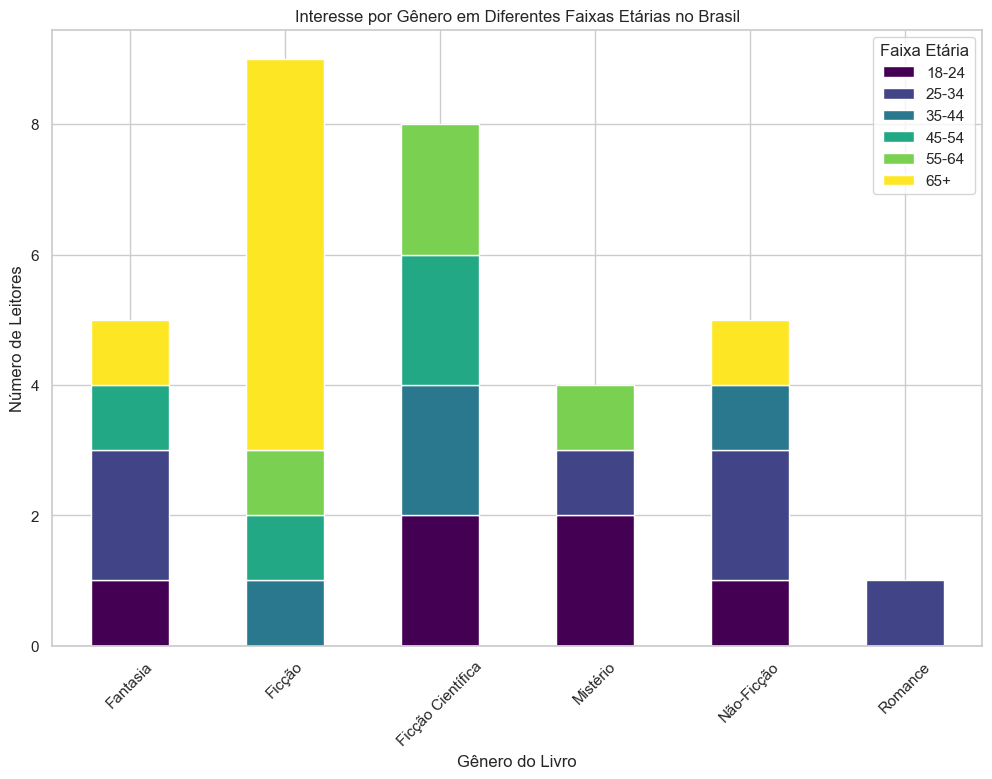

In [63]:
# Análise de Popularidade de Gênero por Faixa Etária no Brasil (Gráfico de Barras Empilhadas)
genre_age_group_br: pd.DataFrame = df_br.groupby(['genre', 'age_group']).size().reset_index(name='count')
pivot_table: pd.DataFrame = genre_age_group_br.pivot_table(index='genre', columns='age_group', values='count', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Interesse por Gênero em Diferentes Faixas Etárias no Brasil')
plt.xlabel('Gênero do Livro')
plt.ylabel('Número de Leitores')
plt.xticks(rotation=45)
plt.legend(title='Faixa Etária')
plt.show()


### Preferências de Gênero por Região (Gráfico de Mapa de Calor)  
O mapa de calor mostra a distribuição de gêneros literários por região no Brasil. Identificar as preferências regionais pode ajudar a personalizar a oferta de livros e estratégias de marketing para diferentes áreas geográficas.


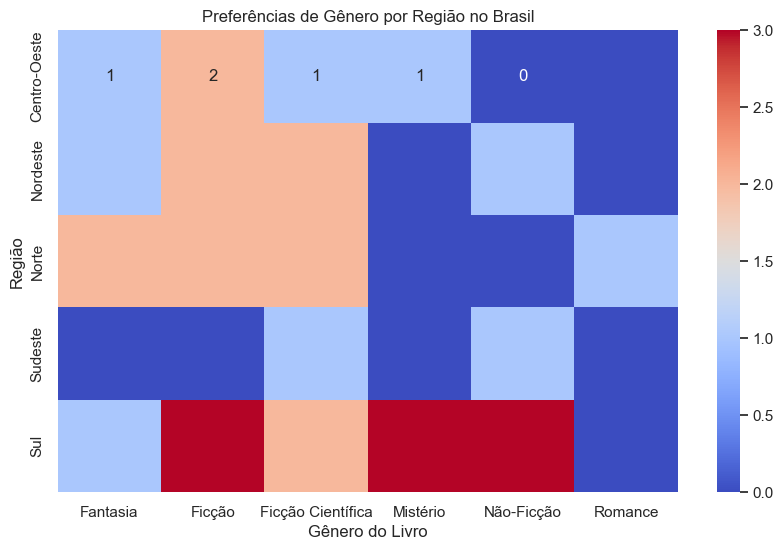

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Parte 3: Análise Regional no Brasil (Gráfico de Mapa de Calor - Heatmap)
genre_region_br: pd.DataFrame = df_br.groupby(['region', 'genre']).size().reset_index(name='count')

# Usar pivot_table para criar a tabela dinâmica
genre_region_pivot: pd.DataFrame = genre_region_br.pivot_table(index='region', columns='genre', values='count', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(genre_region_pivot, annot=True, cmap='coolwarm', fmt='g')
plt.title('Preferências de Gênero por Região no Brasil')
plt.xlabel('Gênero do Livro')
plt.ylabel('Região')
plt.show()


### Distribuição de Idade por Gênero (Gráfico de Violino)
 
O gráfico de violino apresenta a distribuição da idade dos leitores para cada gênero literário. Ele revela a variação etária dentro dos gêneros e pode fornecer insights sobre quais gêneros atraem diferentes faixas etárias.


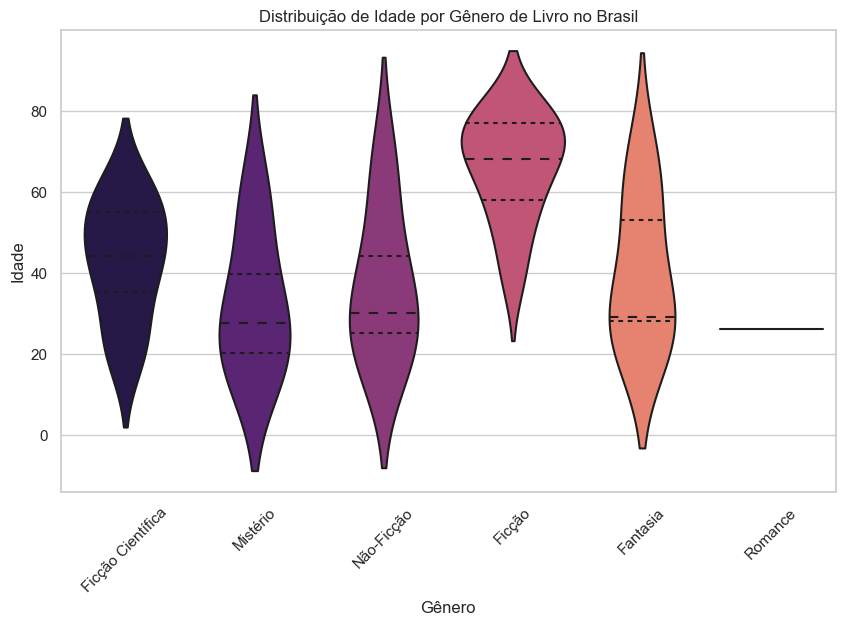

In [70]:
from typing import Callable

# Parte 4: Análise da Média de Idade por Gênero no Brasil (Gráfico de Violino)
def simulate_age(row: str) -> float:
    if row == '18-24':
        return np.random.randint(18, 25)
    elif row == '25-34':
        return np.random.randint(25, 35)
    elif row == '35-44':
        return np.random.randint(35, 45)
    elif row == '45-54':
        return np.random.randint(45, 55)
    elif row == '55-64':
        return np.random.randint(55, 65)
    else:
        return np.random.randint(65, 80)

df_br['age'] = df_br['age_group'].apply(simulate_age).astype(float)  # Convertendo idade para float

plt.figure(figsize=(10, 6))
sns.violinplot(x='genre', y='age', data=df_br, palette='magma', inner='quartile')
plt.title('Distribuição de Idade por Gênero de Livro no Brasil')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.show()


### Gêneros Mais Vendidos ou Vistos por Estado (Gráfico de Barras Agrupadas)

O gráfico de barras agrupadas indica quais gêneros literários são mais populares em cada estado brasileiro. Esses dados são valiosos para ajustar a distribuição e promover gêneros mais procurados em diferentes estados.


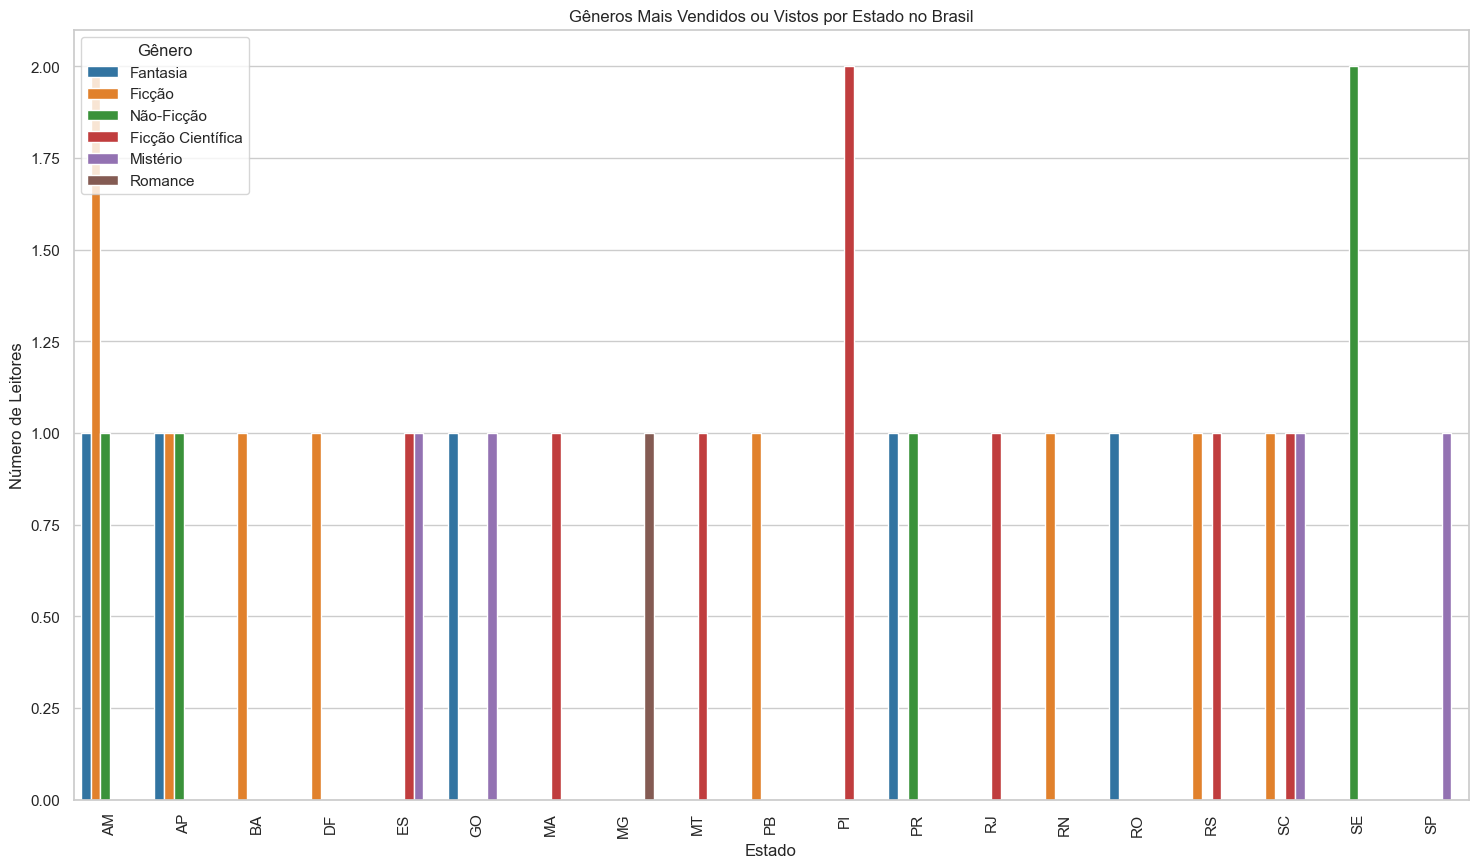

In [71]:
# Parte 5: Análise de Gêneros Mais Vendidos ou Vistos em Cada Estado do Brasil (Gráfico de Barras Agrupadas)
df_br['state'] = np.random.choice(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'], len(df))
genre_state_br: pd.DataFrame = df_br.groupby(['state', 'genre']).size().reset_index(name='count')
plt.figure(figsize=(18, 10))
sns.barplot(x='state', y='count', hue='genre', data=genre_state_br, palette='tab10')
plt.title('Gêneros Mais Vendidos ou Vistos por Estado no Brasil')
plt.xlabel('Estado')
plt.ylabel('Número de Leitores')
plt.xticks(rotation=90)
plt.legend(title='Gênero')
plt.show()
